In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
import cv2
from PIL import Image
import os
import joblib
%matplotlib inline

In [72]:
import warnings
warnings.filterwarnings("ignore")

Github URL = https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/archive/master.zip


In [73]:
import requests
from zipfile import ZipFile

# # Local path
# download_path = "C:\\Users\\klper\\OneDrive\\Desktop\\NITJ\\Computer Programming\\Programs\\Data Science\\DL\\Brain Tumour Classification"

# # Download the dataset as a zip file
# response = requests.get(github_url)
# zip_file_path = os.path.join(download_path,"dataset.zip")

# # Extract the contents of the zip file
# with open(zip_file_path, "wb") as zip_file:
#     zip_file.write(response.content)
# with ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(download_path)

TRAINING_PATH= "Dataset/Training"
TESTING_PATH= "Dataset/Testing"


In [74]:
training_images= []
training_labels= []

### Samples

In [75]:
TRAINING_PATH = "Dataset/Training"

sample_images = {
    'glioma': 'glioma_tumor/gg (1).jpg',
    'meningioma': 'meningioma_tumor/m (2).jpg',  
    'notumor': 'no_tumor/1.jpg',              
    'pituitary': 'pituitary_tumor/p (1).jpg'    
}

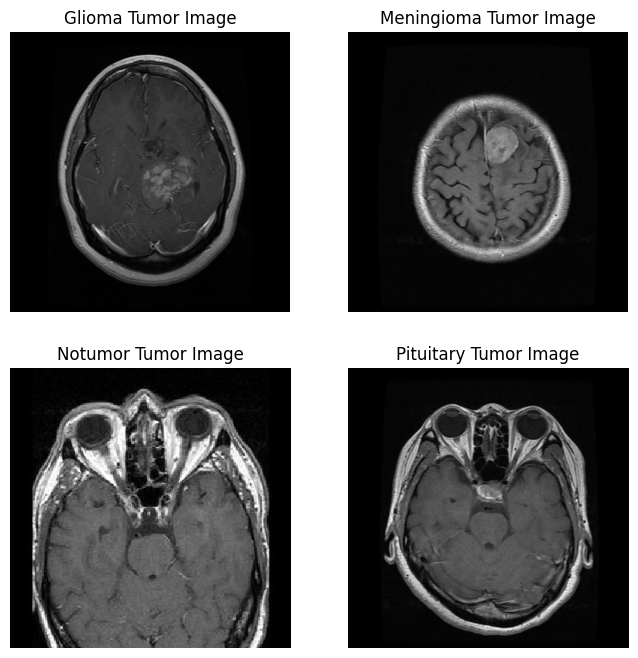

In [32]:
plt.figure(figsize=(8,8))
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

for i, category in enumerate(categories):
    img_path = os.path.join(TRAINING_PATH, sample_images[category])
    img = cv2.imread(img_path)
    
    if img is not None:
        # Convert BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax = plt.subplot(2, 2, i+1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(category.capitalize() + ' Tumor Image')
    else:
        print(f"Failed to read image from path: {img_path}")

plt.show()

In [33]:
for i in os.listdir(TRAINING_PATH):
  class_name= i
  class_path= os.path.join(TRAINING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path= os.path.join(class_path, j)
    img= cv2.imread(img_path)
    img_resized= cv2.resize(img,(256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

In [34]:
for i in os.listdir(TESTING_PATH):
  class_name= i
  class_path= os.path.join(TESTING_PATH, class_name)
  for j in os.listdir(class_path):
    img_path= os.path.join(class_path, j)
    img= cv2.imread(img_path)
    img_resized= cv2.resize(img,(256,256))
    training_images.append(img_resized)
    training_labels.append(class_name)

### Train-Test-Split

In [35]:
data_dir= TRAINING_PATH

In [36]:
def crop_img(img):
	# crops the rectangular portion of extreme points on the image
	gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray= cv2.GaussianBlur(gray,(3,3),0)

	# threshold the image, then perform a series of erosions + dilations (removes small regions of noise)
	thresh= cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh= cv2.erode(thresh, None, iterations=2)
	thresh= cv2.dilate(thresh, None, iterations=2)

	# find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
	
	return new_img

In [37]:
import shutil
import itertools
import imutils

img = cv2.imread('Dataset\Training\meningioma_tumor\m (2).jpg')
img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

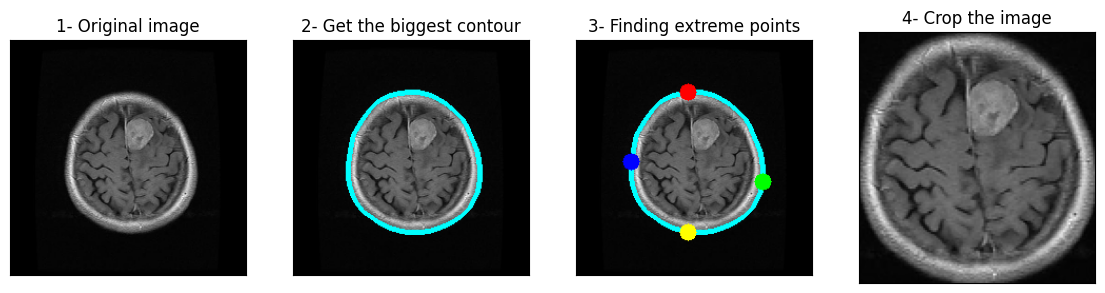

In [38]:
plt.figure(figsize=(14,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('1- Original image')

plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('2- Get the biggest contour')

plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('3- Finding extreme points')

plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('4- Crop the image')
plt.show()

In [39]:
from tqdm import tqdm

In [40]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

TRAINING_PATH = "Dataset/Training"
TESTING_PATH = "Dataset/Testing"

labels = ['glioma', 'meningioma', 'no', 'pituitary']


x_train = []  # Training images
y_train = []  # Training labels
x_test = []   # Testing images
y_test = []   # Testing labels

def load_images(data_path, label):
    images = []
    labels_list = []
    for file in tqdm(os.listdir(data_path)):
        image_path = os.path.join(data_path, file)
        image = cv2.imread(image_path, 0) 
        if image is not None:
            image = cv2.bilateralFilter(image, 2, 50, 50)  # Remove image noise
            image = cv2.applyColorMap(image, cv2.COLORMAP_BONE)  # Produce a pseudocolored image
            image = cv2.resize(image, (200,200))
            images.append(image)
            labels_list.append(labels.index(label))
        else:
            print(f"Failed to read image: {image_path}")
    return images, labels_list

# Load training images
for label in labels:
    trainPath = os.path.join(TRAINING_PATH, label + '_tumor')
    images, labels_list = load_images(trainPath, label)
    x_train.extend(images)
    y_train.extend(labels_list)

# Load testing images
for label in labels:
    testPath= os.path.join(TESTING_PATH, label + '_tumor')
    images, labels_list = load_images(testPath, label)
    x_test.extend(images)
    y_test.extend(labels_list)


100%|██████████| 74/74 [00:00<00:00, 196.83it/s]


In [41]:
x_train= np.array(x_train)/255
x_test= np.array(x_test)/255

In [42]:
print(x_train.shape)
print(x_test.shape)

(2870, 200, 200, 3)
(394, 200, 200, 3)


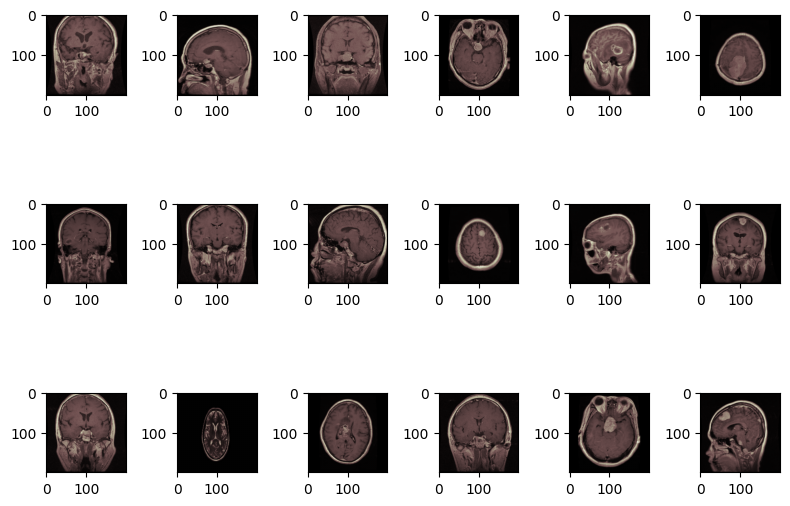

In [49]:
images= [x_train[i] for i in range(18)]
fig, axes= plt.subplots(3,6, figsize=(8,6))
axes= axes.flatten()
for img, ax in zip(images, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

In [44]:
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, save_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization,Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation,GlobalAveragePooling2D

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train,y_train, random_state=42) 

#One Hot Encoding
y_train = tensorflow.keras.utils.to_categorical(y_train) 
y_test = tensorflow.keras.utils.to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_val.shape)

(574, 200, 200, 3)


In [53]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [54]:
os.mkdir('preview_2')

x = x_train[0]  
x = x.reshape((1,) + x.shape) 

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview_2', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break 
     

In [46]:
np.unique(training_labels)

array(['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'],
      dtype='<U16')

### Image Augmentation

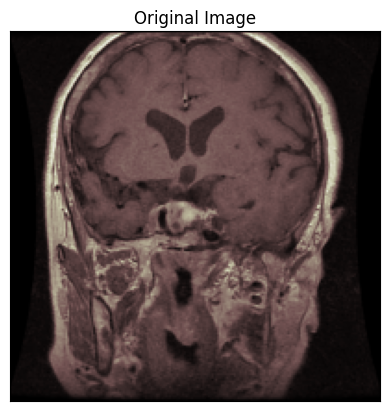

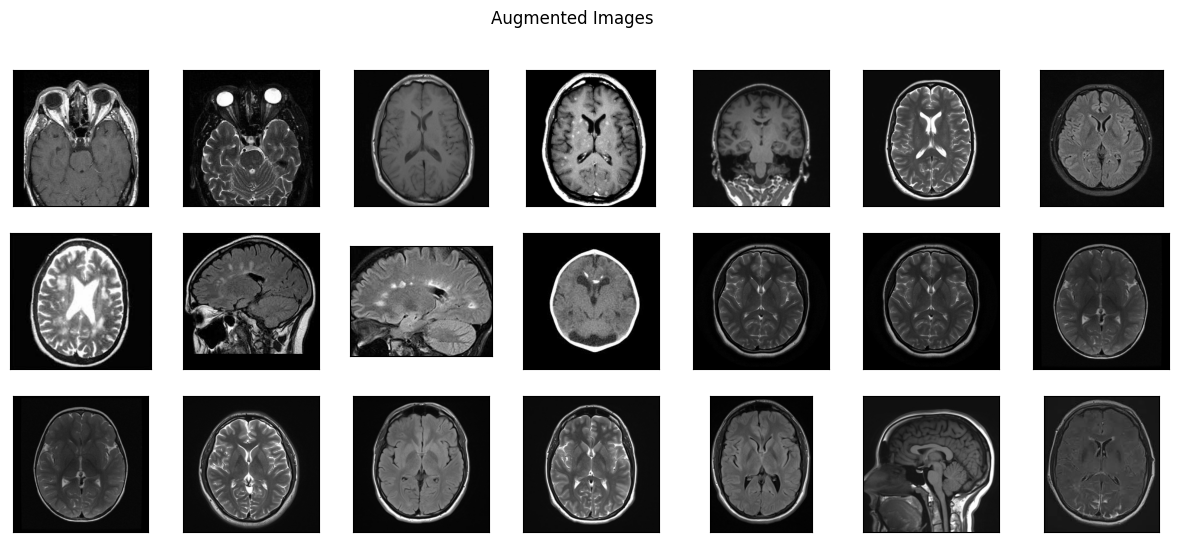

In [55]:
import os
import cv2
import matplotlib.pyplot as plt

plt.imshow(x[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

preview_path = 'Dataset/Training/no_tumor/'  
plt.figure(figsize=(15, 6))
i = 1

# Loop through the images in the specified directory
for img_file in os.listdir(preview_path):
    img = cv2.imread(os.path.join(preview_path, img_file))
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 7, i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i>21:
            break
    else:
        print(f"Failed to read image: {img_file}")

# Set the super title for the entire figure
plt.suptitle('Augmented Images')
plt.show()


In [56]:
# Performing random rotations and translations on image
datagen= ImageDataGenerator(
     rotation_range=10,                        
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)

datagen.fit(x_train)

In [57]:
from tensorflow.keras.applications.resnet import ResNet50
IMG_SIZE=(200,200)
conv_base = ResNet50(
    include_top=False,
    input_shape=IMG_SIZE + (3,),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

In [58]:
from tensorflow.keras.optimizers import Adam

model = conv_base.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.4)(model)
model = Dense(4, activation="softmax")(model)
model = Model(inputs= conv_base.input, outputs= model)

#compile our model.
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 100, 100, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [59]:
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss',mode='min',verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_lr=1/1e8)]


In [60]:
train_len= len(x_train)
val_len= len(x_val)
print("Training Data length: ",train_len)
print("Validation Data length: ",val_len)

Training Data length:  2296
Validation Data length:  574


In [61]:
history= model.fit(datagen.flow(x_train, y_train, batch_size=64),validation_data= (x_val,y_val),epochs= 10,callbacks= callbacks)

Epoch 1/10


36/36 [==============================] - ETA: 0s - loss: 0.4805 - accuracy: 0.8123
Epoch 1: val_loss improved from inf to 1.92933, saving model to .mdl_wts.hdf5
36/36 [==============================] - 316s 8s/step - loss: 0.4805 - accuracy: 0.8123 - val_loss: 1.9293 - val_accuracy: 0.3240 - lr: 1.0000e-04
Epoch 2/10
36/36 [==============================] - ETA: 0s - loss: 0.1349 - accuracy: 0.9530
Epoch 2: val_loss did not improve from 1.92933
36/36 [==============================] - 252s 7s/step - loss: 0.1349 - accuracy: 0.9530 - val_loss: 3.1258 - val_accuracy: 0.1237 - lr: 1.0000e-04
Epoch 3/10
36/36 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9704
Epoch 3: val_loss did not improve from 1.92933

Epoch 3: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
36/36 [==============================] - 227s 6s/step - loss: 0.0894 - accuracy: 0.9704 - val_loss: 3.8371 - val_accuracy: 0.1237 - lr: 1.0000e-04
Epoch 4/10
36/36 [=======

In [ ]:
loss,acc = model.evaluate(x_test,y_test)

41/41 [==============================] - 3s 51ms/step - loss: 1.5991 - accuracy: 0.9886


In [ ]:
import seaborn as sns
predicted_classes = np.argmax(model.predict(x_test), axis = 1)
print(classification_report(np.argmax(y_test,axis=1), predicted_classes,target_names=['glioma','meningioma','no_tumor','pituitary']))

              precision    recall  f1-score   support

      glioma       0.99      0.97      0.98       300
  meningioma       0.97      0.99      0.98       306
    no_tumor       1.00      1.00      1.00       405
   pituitary       1.00      1.00      1.00       300

    accuracy                           0.99      1311
   macro avg       0.99      0.99      0.99      1311
weighted avg       0.99      0.99      0.99      1311



164/164 [==============================] - 3s 17ms/step


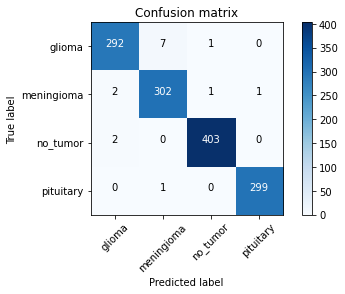

In [ ]:
import itertools
pred_Y = model.predict(x_test, batch_size = 8, verbose = True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names=['glioma','meningioma','no_tumor','pituitary']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test, batch_size=8)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4)) 

In [64]:
from tensorflow.keras.models import load_model
model= load_model('Resnet.hdf5')

### Applying Inception Model

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout

inception_resnetv2= tf.keras.applications.InceptionResNetV2(
    include_top= False,
    weights= "imagenet",
    input_shape= (256, 256, 3),
    pooling= "avg",
)

dropout_rate= 0.5
model= tf.keras.Sequential([
    inception_resnetv2,
    Dropout(dropout_rate),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    Dropout(dropout_rate),
    tf.keras.layers.Dense(4,activation='softmax')
])

batch_size=32
# model.compile(optimizer='adam',loss='categorical_crossentropy')
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


219055592/219055592 [==============================] - 179s 1us/step



In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                        

In [37]:
for layer in inception_resnetv2.layers:
  layer.trainable= False

To streamline computations, we employ a dropout rate of 50%. <br>Dropout is a technique used during training to prevent overfitting by randomly deactivating 50% of neurons in the hidden layers.

Within the hidden layers, we utilize the **Rectified Linear Unit (ReLU)** activation function. 
The output layer utilizes the **Softmax activation function**. Softmax is particularly useful for multi-class classification tasks. 

In [38]:
model_inception= tf.keras.models.Sequential()
model_inception.add(inception_resnetv2)

model_inception.add(tf.keras.layers.Flatten())
model_inception.add(tf.keras.layers.Dropout(0.5))
model_inception.add(tf.keras.layers.Dense(256,activation="relu",kernel_initializer='he_uniform'))
model_inception.add(tf.keras.layers.Dropout(0.5))
model_inception.add(tf.keras.layers.Dense(4,activation="softmax"))

In [39]:
model_inception.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [41]:
history=model_inception.fit(x_train,y_train,batch_size=64,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
36/36 [==============================] - 231s 6s/step - loss: 0.7032 - accuracy: 0.7299 - val_loss: 0.5642 - val_accuracy: 0.7806
Epoch 2/15
36/36 [==============================] - 307s 9s/step - loss: 0.6840 - accuracy: 0.7338 - val_loss: 0.5797 - val_accuracy: 0.7765
Epoch 3/15
36/36 [==============================] - 206s 6s/step - loss: 0.6191 - accuracy: 0.7684 - val_loss: 0.5204 - val_accuracy: 0.8051
Epoch 4/15
36/36 [==============================] - 272s 8s/step - loss: 0.5973 - accuracy: 0.7675 - val_loss: 0.4885 - val_accuracy: 0.8153
Epoch 5/15
36/36 [==============================] - 224s 6s/step - loss: 0.5865 - accuracy: 0.7741 - val_loss: 0.4978 - val_accuracy: 0.8010
Epoch 6/15
36/36 [==============================] - 194s 5s/step - loss: 0.5554 - accuracy: 0.7732 - val_loss: 0.4969 - val_accuracy: 0.8031
Epoch 7/15
36/36 [==============================] - 190s 5s/step - loss: 0.5678 - accuracy: 0.7806 - val_loss: 0.4752 - val_accuracy: 0.8204
Epoch 8/15
36

In [174]:
model.evaluate(x_val,y_val)

31/31 [==============================] - 123s 4s/step - loss: 0.2922 - accuracy: 0.8949


[0.2921762764453888, 0.8948979377746582]

In [177]:
print("Shape of x_val:",x_val.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_val: (980, 256, 256, 3)
Shape of y_val: (980, 4)


In [175]:
y_pred= model.predict(x_val)

31/31 [==============================] - 91s 3s/step


In [176]:
y_pred_new= np.argmax(y_pred,axis=1)
y_test_new= np.argmax(y_val,axis=1)

In [178]:
print(classification_report(y_test_new,y_pred_new))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       307
           1       0.77      0.93      0.84       283
           2       0.98      0.87      0.92       139
           3       0.96      0.94      0.95       251

    accuracy                           0.89       980
   macro avg       0.92      0.89      0.90       980
weighted avg       0.91      0.89      0.90       980



### Sample Predictions

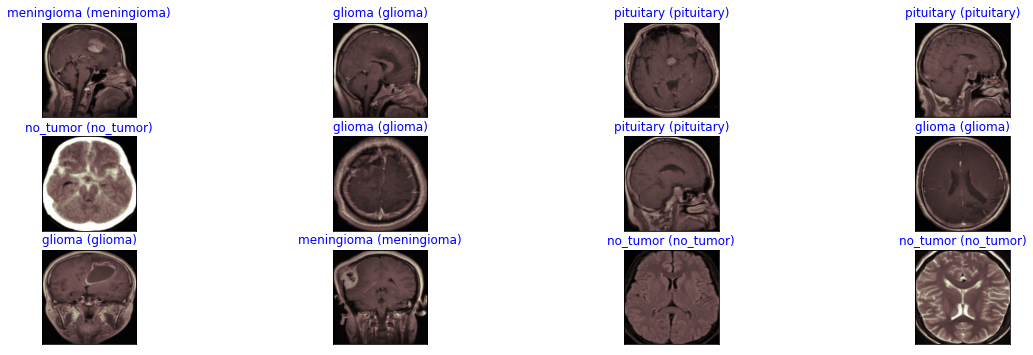

In [ ]:
y_hat = model.predict(x_test)
target_labels = ['glioma','meningioma','no_tumor','pituitary']

fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))